<a href="https://colab.research.google.com/github/virbedi/Music_recommendation_calculator/blob/master/MusicRecommendationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECE 160 Multimedia Systems: Mini Project 3**
Vir Bedi 

In [ ]:
!pip install essentia
import IPython as ipy
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats.mstats import gmean
import essentia.standard as es
import pickle 

#Mounting the shared drive
from google.colab import drive
drive.mount('/content/drive')
musicDir = '/content/drive/Shared drives/ECE160-Visell-2020/Media Files/similarity_dataFolderSubset/'
fs = 44100 

     |████████████████████████████████| 11.7MB 331kB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#This is a song object and is used to store all the song feature data 
class Song:
  def __init__(self, name, tempo, centroid, ampVariance, spectralFlatness, zeroCrossing,genre, path, audioSig):
    self.name = name
    self.tempo = tempo
    self.centroid = centroid
    self.ampVariance = ampVariance
    self.spectralFlatness = spectralFlatness
    self.zeroCrossing = zeroCrossing 
    self.genre = genre 
    self.path = path
    self.audioSig = audioSig

Functions for calculations 

In [ ]:
def calculate_spectral_centroid_index(spectrum):
    k = range(len(spectrum))
    weighted_spectrum = np.sum(k*spectrum)
    centroid_index = weighted_spectrum/np.sum(spectrum)
    return centroid_index

def ZeroCrossingRate(x):
    BlockLength = 1024
    HopLength = 128
    NumBlocks = math.ceil(x.size / HopLength) #Taking the upper absolute value 
    crossRate = 0.5 * np.mean(np.abs(np.diff(np.sign(x[np.arange(0,x.size)]))))
    return (crossRate)

def similarityScore(Song1, Song2):
    tempo = abs(Song1.tempo - Song2.tempo)
    centroid = abs(Song1.centroid-Song2.centroid)
    ampVar = abs(Song1.ampVariance-Song2.ampVariance)
    spectralFlatness = abs(Song1.spectralFlatness-Song2.spectralFlatness)
    zeroCrossing = abs(Song1.zeroCrossing - Song2.zeroCrossing)
    return 0.10*centroid + 0.10*ampVar + 0.23*zeroCrossing + 0.44*tempo + 0.13*spectralFlatness

def getFeatures(name,genre,audioSig):
    #Get Name of Song 
    Name = name 
    Path = musicDir + Name 
    #Get Tempo
    rhythm_extractor = es.RhythmExtractor2013(method="multifeature") 
    tempo, beats, beats_confidence, _, beats_intervals = rhythm_extractor(audioSig)
    
    #Get Centroid 
    Nsamples = len(audio_sig)
    fs=44100
    ff = np.arange(0,fs,fs/Nsamples)
    song_spectrum = np.fft.fft(audio_sig)
    half_spectrum = np.abs(song_spectrum)
    half_spectrum = half_spectrum[0:int(Nsamples/2)]
    centroid_index = calculate_spectral_centroid_index(half_spectrum)
    centroid = ff[int(centroid_index)]
    
    #Get Amplitude Variance 
    amplitudeVar = np.var(audio_sig)
    
    #Spectral Flatness 
    spectralFlatness = gmean(half_spectrum)/np.mean(half_spectrum)

    #Zero Crossings
    zeroCrossings =  ZeroCrossingRate(audio_sig)
    
    #Returning Song object with the values as attributes 
    Result = Song(Name,tempo,centroid,amplitudeVar,spectralFlatness,zeroCrossings,genre,Path,audioSig)

    return Result 

This block was used to calculate all the features and store the data in the shared drive as a Pickle object

In [ ]:
# Library = []
# with os.scandir(musicDir) as entries:
#     genre_path = musicDir + '/'
#     with os.scandir(genre_path) as songs:
#       count = 0
#       for song in songs:
#         song_name = song.name 
#         song_genre = "Insert Genre Here"
#         count+=1
#         if count%10 == 0:
#           print(count,"/300")
#         loader = es.MonoLoader(filename = genre_path+song_name)
#         audio_sig = loader()
#         currentSong = getFeatures(song_name,song_genre,audio_sig)
#         Library.append(currentSong)
# #Storing the Library as a pkl file in drive 
# with open('/content/drive/Shared drives/Pickle/Library.pkl', 'wb') as f:
#      pickle.dump(Library, f)
#      print("Songs data has been uploaded to shared drive ")

In [ ]:
#Getting song data from Pickle file in Shared Drive 
with open('/content/drive/Shared drives/Pickle/Library.pkl', 'rb') as f:
     Library = pickle.load(f)


Top 10 Similar songs from the dataset
-------------------------------------
wicked_boy-chemistry-10-chemistry-233-262.mp3 Score: 7.4748998115176395
kitka-wintersongs-06-otche_nash_russia_bulgaria-59-88.mp3 Score: 8.974399950098507
new_york_consort_of_viols-dances_and_canzonas_of_holborne_and_brade-03-pavan_and_galliard_holborne-0-29.mp3 Score: 14.920137899168811
four_stones_net-ridin_the_faders-04-part_4-59-88.mp3 Score: 15.706842662286594
monks_and_choirs_of_kiev_pechersk_lavra-chants_of_the_russian_orthodox_church-06-the_easter_day_proclaiming-88-117.mp3 Score: 19.55971030480537
dj_cary-eastern_grooves-08-arabesquehans_christian-262-291.mp3 Score: 20.049959587667924
hans_christian-surrender-05-capricorn_child-59-88.mp3 Score: 20.559178007118152
curl-ultimate_station-08-ultimate_station-59-88.mp3 Score: 22.18080572390748
ya_elah-each_of_us-02-yipatach_libi-88-117.mp3 Score: 23.60453173885003
mr_gelatine-electroluv-02-frank-59-88.mp3 Score: 26.0456183925162


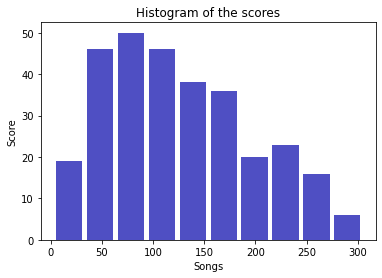

In [ ]:
#Enter a path for the song you would like to find similar songs for 
path = '/content/drive/Shared drives/ECE160-Visell-2020/Media Files/similarity_dataFolderSubset/classical2.wav'
loader = es.MonoLoader(filename = path)
audio_sig = loader()
givenSong = getFeatures('Name','Genre',audio_sig)



#Calculates the similarity score of each song 
scores = []
for song in Library:
  scores.append(similarityScore(givenSong,song))

#Sorting the results by smallest score first 
results = np.argsort(scores)

print("Top 10 Similar songs from the dataset")
print("-------------------------------------")
for i in range(1,11):
  index = results[i]
  data = Library[index].audioSig
  print(Library[index].name, "Score:",scores[index])


plt.hist(x = scores, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Songs')
plt.ylabel('Score')
plt.title('Histogram of the scores')
plt.show()

From the histogram above, we can see that most songs have a very high score and only a few of them have low scores which is good since this means I was able to narrow down my list of songs based on the calculated features.

In [ ]:
#To listen to any of the top ten songs, fill in the index variable eg: index = 1 to play first song 
index = 0
songIndex = results[index]
data = Library[songIndex].audioSig
ipy.display.Audio(data,rate = fs)

In my approach, I extract certain features from the given audio signals and store them in a Shared Drive.  
 In order to get better results, I use low and mid level features to give the songs a similarity score based on how far thier features are from the given song. The songs with the lowest similarity scores are the closest to the given song since their features have the least difference.  

Features Used:  

*   Centroid
*   Amplitude Variance 
*   Zero Crossing 
*   Spectral Flatness
*   Tempo  
  

By adjusting the weights for the given features, I was able to find certain weights that gave me appropriate results, although these results are subjective and might differ in opinion from person to person.  
  
Using information from the Lerch Textbook (pg154) I decided to use Temporal Characteristics (tempo) and Dynamic characteristics since the book states that classification with common characteristcs such as intensity have proved to give good results. I gave the most weight to Tempo and Zero Crossing rate and lesser weight to the centroid and amplitude variance. 


